### Load row image dataset for detection

In [1]:
from mxnet.gluon.data.vision import transforms, datasets
import cv2
import matplotlib.pyplot as plt 
from gluoncv.utils import viz
%matplotlib inline

In [3]:
train_dataset = datasets.ImageFolderDataset('../.mxnet/datasets/ITW_row/')

119141
Data type: <class 'numpy.uint8'>
Label: 0
Label description: cloudy


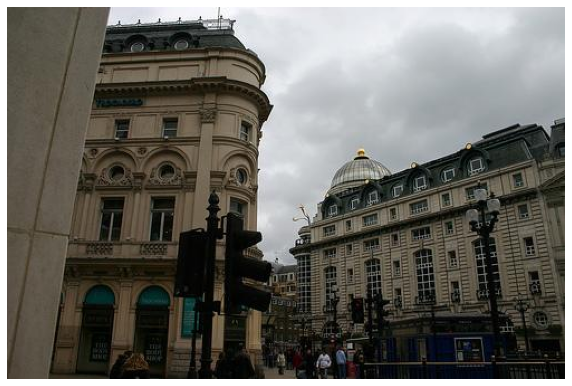

In [4]:
print(len(train_dataset))
sample_idx = 999
sample = train_dataset[sample_idx]
data = sample[0]
label = sample[1]

print("Data type: {}".format(data.dtype))
print("Label: {}".format(label))
print("Label description: {}".format(train_dataset.synsets[label]))

plt.figure(figsize=(10,10))
plt.imshow(data.asnumpy())
plt.axis("off")
plt.show()

### Load rec image dataset for detection

In [3]:
import os
from mxnet import nd
from mxnet.io import ImageRecordIter

In [4]:
rec_path = os.path.expanduser('~/.mxnet/datasets/ITW_rec/')

In [61]:
crop_ratio = 0.875 if 0.875 > 0 else 0.875

mean_rgb = [10, 10, 10]
std_rgb = [1.0, 1.0, 1.0]
    
train_data = ImageRecordIter(
    path_imgrec = os.path.join(rec_path, 'train.rec'),
    path_imgidx = os.path.join(rec_path, 'train.idx'),
    data_shape  = (3, 416, 416),
    batch_size  = 32,
    mean_r=mean_rgb[0],
    mean_g=mean_rgb[1],
    mean_b=mean_rgb[2],
    std_r=std_rgb[0],
    std_g=std_rgb[1],
    std_b=std_rgb[2],
)

for batch in train_data:
    print(batch.data[0].shape, batch.label[0].shape)
    break

(32, 3, 416, 416) (32,)


(3, 416, 416)


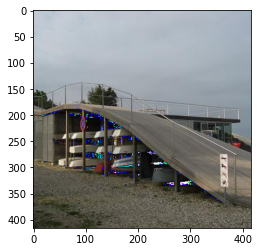

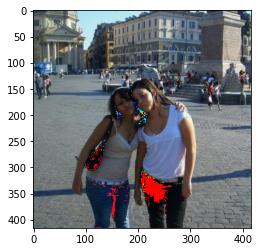

In [62]:
for batch in train_data:
    print(batch.data[0][31].shape)
    viz.plot_image(nd.transpose(batch.data[0][31], (1, 2, 0)))
    viz.plot_image(nd.transpose(batch.data[0][21], (1, 2, 0)))
    break